In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os
from google.colab.patches import cv2_imshow
import cv2 as cv

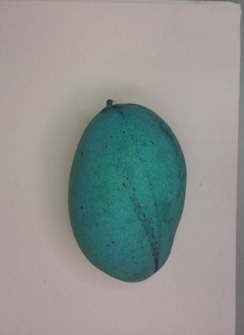

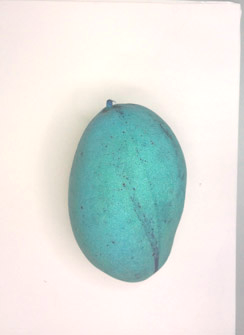

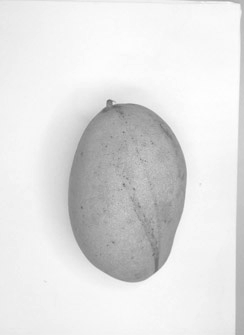

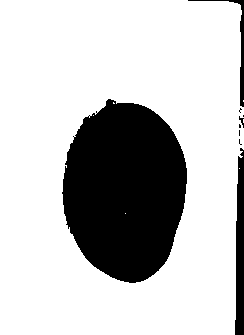

In [4]:
from google.colab.patches import cv2_imshow
import cv2 as cv

# Cargar la imagen
img = cv.imread('/content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/images/100a.jpg')

# Ajustar el brillo y el contraste
alpha = 1.2  # Ajuste de contraste
beta = 50    # Ajuste de brillo
img_ajustada = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# Convertir a escala de grises
img_gris = cv.cvtColor(img_ajustada, cv.COLOR_BGR2GRAY)

# Aplicar umbralización binaria
_, img_binaria = cv.threshold(img_gris, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

# Mostrar las imágenes en cada paso
cv2_imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
cv2_imshow(cv.cvtColor(img_ajustada, cv.COLOR_BGR2RGB))
cv2_imshow(img_gris)
cv2_imshow(img_binaria)

In [5]:
import os
import cv2 as cv

# Ruta de la carpeta con las imágenes originales
folder_path = '/content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/images'

# Ruta de la carpeta para guardar las imágenes ajustadas
output_folder = '/content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/imagenes_nuevas'

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

# Parámetros de ajuste de brillo y contraste
alpha = 1.2  # Ajuste de contraste
beta = 50    # Ajuste de brillo

# Iterar sobre cada imagen en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Cargar la imagen
        img_path = os.path.join(folder_path, filename)
        img = cv.imread(img_path)

        # Ajustar el brillo y el contraste
        img_ajustada = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

        # Convertir a escala de grises
        img_gris = cv.cvtColor(img_ajustada, cv.COLOR_BGR2GRAY)

        # Aplicar umbralización binaria
        _, img_binaria = cv.threshold(img_gris, 80, 255, cv.THRESH_BINARY)

        # Guardar la imagen ajustada en la carpeta de salida
        output_path = os.path.join(output_folder, filename)
        cv.imwrite(output_path, img_binaria)

        print(f"Imagen {filename} procesada y guardada en {output_path}")


Imagen 7a.jpg procesada y guardada en /content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/imagenes_nuevas/7a.jpg
Imagen 60b.jpg procesada y guardada en /content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/imagenes_nuevas/60b.jpg
Imagen 138b.jpg procesada y guardada en /content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/imagenes_nuevas/138b.jpg
Imagen 211b.jpg procesada y guardada en /content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/imagenes_nuevas/211b.jpg
Imagen 83a.jpg procesada y guardada en /content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/imagenes_nuevas/83a.jpg
Imagen 134a.jpg procesada y guardada en /content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/imagenes_nuevas/134a.jpg
Imagen 159a.jpg procesada y guardada en /content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/

In [28]:
import os
import cv2 as cv
import numpy as np

# Ruta de la carpeta con las imágenes
folder_path = '/content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/imagenes_nuevas'

# Lista para almacenar los nombres de las imágenes y sus momentos de Hu
hu_moments_with_names = []

# Iterar sobre cada imagen en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Cargar la imagen en escala de grises
        img_path = os.path.join(folder_path, filename)
        img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

        # Calcular los momentos de Hu
        moments = cv.moments(img)
        hu_moments = cv.HuMoments(moments)

        # Tomar los primeros 7 momentos de Hu
        hu_moments = np.squeeze(hu_moments)
        hu_moments = hu_moments[:7]

        # Guardar el nombre de la imagen y sus momentos de Hu
        hu_moments_with_names.append((filename, hu_moments))

        print(f"Los 7 momentos de Hu para {filename} son: {hu_moments}")

# Guardar los nombres de las imágenes y sus momentos de Hu en un archivo de texto
output_file = '/content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/Hu_Moment.csv'
with open(output_file, 'w') as f:
    # Escribir los encabezados
    f.write("Nombre de la imagen, Momento Hu 1, Momento Hu 2, Momento Hu 3, Momento Hu 4, Momento Hu 5, Momento Hu 6, Momento Hu 7\n")

    # Escribir los nombres de las imágenes y sus momentos de Hu
    for name, hu_moments in hu_moments_with_names:
        f.write(f"{name}, {', '.join(map(str, hu_moments))}\n")

print(f"Los nombres de las imágenes y sus 7 momentos de Hu se han guardado en {output_file}")



Los 7 momentos de Hu para 7a.jpg son: [6.86694301e-04 4.43739196e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Los 7 momentos de Hu para 60b.jpg son: [6.86694301e-04 4.43739196e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Los 7 momentos de Hu para 138b.jpg son: [6.86694301e-04 4.43739196e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Los 7 momentos de Hu para 134a.jpg son: [6.86694301e-04 4.43739196e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Los 7 momentos de Hu para 83a.jpg son: [6.86694301e-04 4.43739196e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Los 7 momentos de Hu para 211b.jpg son: [6.87565160e-04 4.55707648e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Los 7 momentos de Hu para 175a.jpg son: [6.86694301e-04 4.43739196e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00

In [29]:
import pandas as pd

# Ruta de los archivos
excel_file = '/content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/Hu_Moment.csv'
csv_file = '/content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/Harumanis_mango_weight.csv'

# Cargar archivo Excel y especificar el motor de lectura como 'openpyxl'

df_excel= pd.read_csv(excel_file)

# Renombrar la columna en el DataFrame de Excel para que coincida con la columna del CSV
df_excel.rename(columns={'Nombre de la imagen': 'no'}, inplace=True)

# Cargar archivo CSV
df_csv = pd.read_csv(csv_file)

# Combinar DataFrames utilizando las columnas 'Fruit No' como clave de combinación
df_combined = pd.merge(df_excel, df_csv, on='no', how='inner')

# Guardar el DataFrame combinado en un nuevo archivo Excel
output_file = '/content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/Datos_peso.xlsx'
df_combined.to_excel(output_file, index=False)

print(f"El DataFrame combinado se ha guardado en {output_file}")


El DataFrame combinado se ha guardado en /content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/Datos_peso.xlsx


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error

# Cargar el nuevo archivo Excel que creamos
datos_peso_file = '/content/drive/MyDrive/Visión por computador/Seguimientos de clase/SEM_8/MangoMass/Datos_peso.xlsx'
df_datos_peso = pd.read_excel(datos_peso_file)

# Dividir los datos en características (X) y etiquetas (y)
X = df_datos_peso.drop(columns=["no", "weight"])  # Excluir las columnas 'no' y 'weight'
y = df_datos_peso["weight"]   # Última columna que es la etiqueta (en este caso, no se utiliza en la regresión)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error absoluto mediano en el conjunto de prueba
mae = median_absolute_error(y_test, y_pred)
print("Error absoluto mediano en el conjunto de prueba:", mae)


Error absoluto mediano en el conjunto de prueba: 0.05053403855983446
